#### Credit: http://karpathy.github.io/2016/05/31/rl/

In [18]:
import numpy as np
import gym
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

In [2]:
env = gym.make("Pong-v0")
observation = env.reset()

(210, 160, 3)


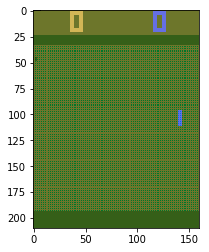

In [48]:
plt.imshow(observation)
print(observation.shape)

Ee receive an image frame (210x160x3 array (integers from 0 to 255 pixel values)) we process it then feed it to our "agent" and it will decide whether it wants to move the paddle UP or DOWN (i.e. a binary choice). After every single choice the game simulator executes the action and gives us a reward: Either a +1 reward if the ball went past the opponent, a -1 reward if we missed the ball, or 0 otherwise. Our agents goal is to move the paddle so that it get lots of reward.

## How does pong work?
#### 1 - receive image frame
#### 2 - move paddle UP/DOWN? (binary)
#### 3 - Make action recieve reward (+1 if moves past opponent, -1 if missed ball, 0 otherwise)

<img src="policy.png">

In [13]:
I = observation[35:195] # crop
I = I[::2,::2,0] # downsample by factor of 2
I[I == 144] = 0 # erase background (background type 1)
I[I == 109] = 0 # erase background (background type 2)
I[I != 0] = 1 # everything else (paddles, ball) just set to 1
flat_I = I.astype(np.float).flatten() # Return a contiguous flattened array.

In [14]:
I.shape, flat_I.shape

((80, 80), (6400,))

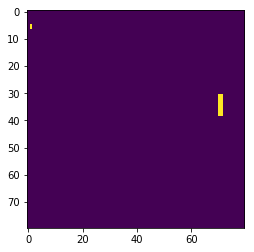

In [16]:
plt.imshow(I)

In [52]:
np.sum(I, axis=-1), I

(array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint64),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8))

1. We dont have the correct labels so as a fake label we substitute the action we happened to sample from the policy 
2. We modulate the loss for each example multiplicatively based on the eventual outcome since we want to increase the log probability for actions that worked and decrease it for those that didnt. 
3. runs on a continuously changing dataset (the episodes), scaled by the advantage, and we only want to do one (or very few) updates based on each sampled dataset.
4. can be used to backprop when nodes are stochastic (!!, more on this later)

## Reinforcement Learning

Reinforcemen Learning is a Branch of machine learning concerned with taking sequences of actions usually described in terms of agent interacting with a previously unknown environment, trying to maximize cumulative reward

## Policy Gradients
### Run a policy for a while. See what actions led to high rewards. Increase their probability.

<img src="rl.png">

<img src='episodes.png'>

What if we made a good action in frame 50 (bouncing the ball back correctly), but then missed the ball in frame 150? If every single action is now labeled as bad (because we lost), wouldn’t that discourage the correct bounce on frame 50? it would. 

<img src='discountedrewardformula.png'>